In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Preprocessing

**LOADING DATA**

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
print(df.isna().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


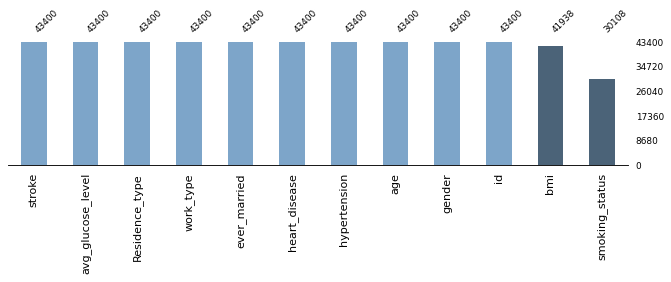

In [ ]:
A= '#7DA5C9'

color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

**DROPPING COLUMN**

In [ ]:
df.drop(columns=['id'],axis=1,inplace=True)
print(df.shape)

(43400, 11)


## Removing Null values / Handling Missing data

**DROPPING ROWS**


In [ ]:
print("Shape of dataframe before dropping:", df.shape)
df = df.dropna(axis = 0, subset = ['smoking_status'])
print("Shape after dropping:", df.shape)

Shape of dataframe before dropping: (43400, 11)
Shape after dropping: (30108, 11)


**Imputing missing Values**

In [ ]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)
print(df['bmi'].isna().sum())

0


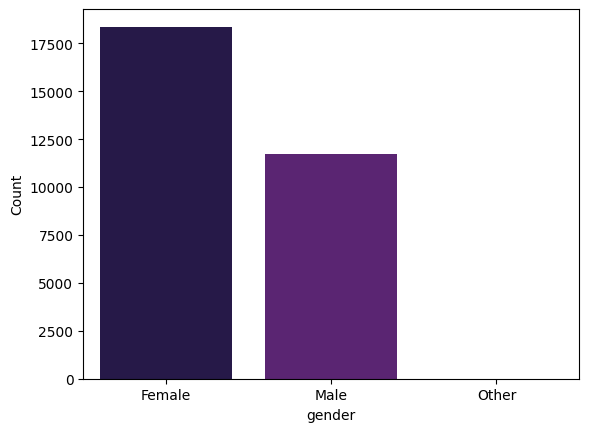

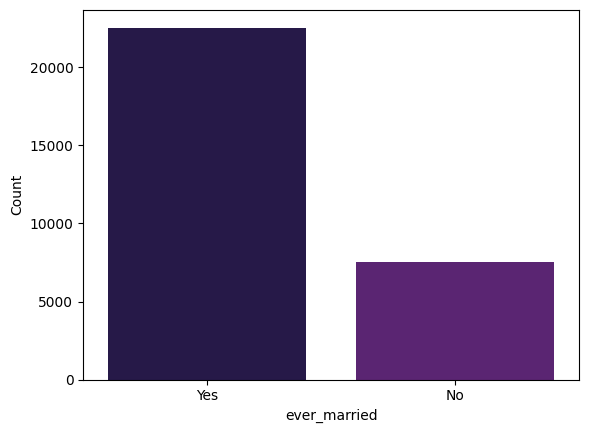

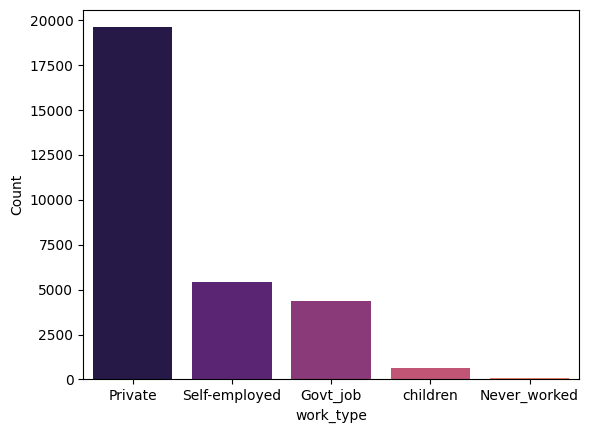

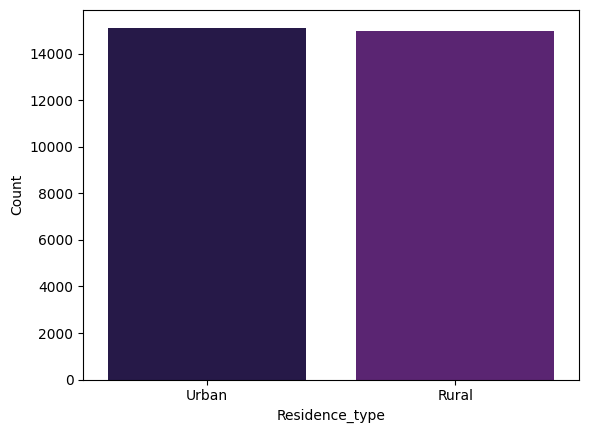

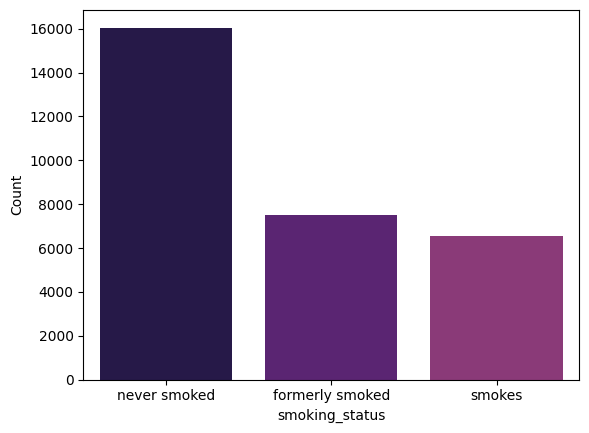

In [ ]:
category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Encoding**

In [ ]:
df = df.join(pd.get_dummies(df['gender']))
df.drop(columns=['gender'], inplace=True)
df.rename(columns={'Female': 'female', 'Male': 'male'}, inplace=True)

df = df.join(pd.get_dummies(df['work_type']))
df.drop(columns=['work_type'], inplace=True)
df.rename(columns={
    'Private': 'private_work', 'Self-employed': 'self_employed',
    'Govt_job': 'government_work', 'children': 'children_work',
    'Never_worked': 'never_worked'}, inplace=True)

df = df.join(pd.get_dummies(df['Residence_type']))
df.drop(columns=['Residence_type'], inplace=True)
df.rename(columns={'Urban': 'urban_resident',
                   'Rural': 'rural_resident'}, inplace=True)

df = df.join(pd.get_dummies(df['smoking_status']))
df.drop(columns=['smoking_status'], inplace=True)
df.rename(columns={'formerly smoked': 'formerly_smoked',
                   'never smoked': 'never_smoked',
                   'Unknown': 'smoking_unknown'}, inplace=True)
df['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['ever_married'].dtype
df.head().T

,1,3,6,7,8
age,58.00,70.00,52.00,75.00,32.00
hypertension,1.00,0.00,0.00,0.00,0.00
heart_disease,0.00,0.00,0.00,1.00,0.00
ever_married,1.00,1.00,1.00,1.00,1.00
avg_glucose_level,87.96,69.04,77.59,243.53,77.67
bmi,39.20,35.90,17.70,27.00,32.30
stroke,0.00,0.00,0.00,0.00,0.00
female,0.00,1.00,1.00,1.00,1.00
male,1.00,0.00,0.00,0.00,0.00
Other,0.00,0.00,0.00,0.00,0.00


In [ ]:
continuous_columns = ['avg_glucose_level', 'bmi', 'age']

scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df[continuous_columns].describe()


,avg_glucose_level,bmi,age
count,3.010800e+04,3.010800e+04,3.010800e+04
mean,1.345189e-16,-2.796576e-16,-8.354329e-17
std,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.135251e+00,-2.815932e+00,-2.023007e+00
25%,-6.385951e-01,-6.949105e-01,-7.964608e-01
50%,-3.218688e-01,-1.575850e-01,3.460978e-03
75%,1.589045e-01,5.070018e-01,7.500546e-01
max,4.000251e+00,8.764846e+00,1.816617e+00


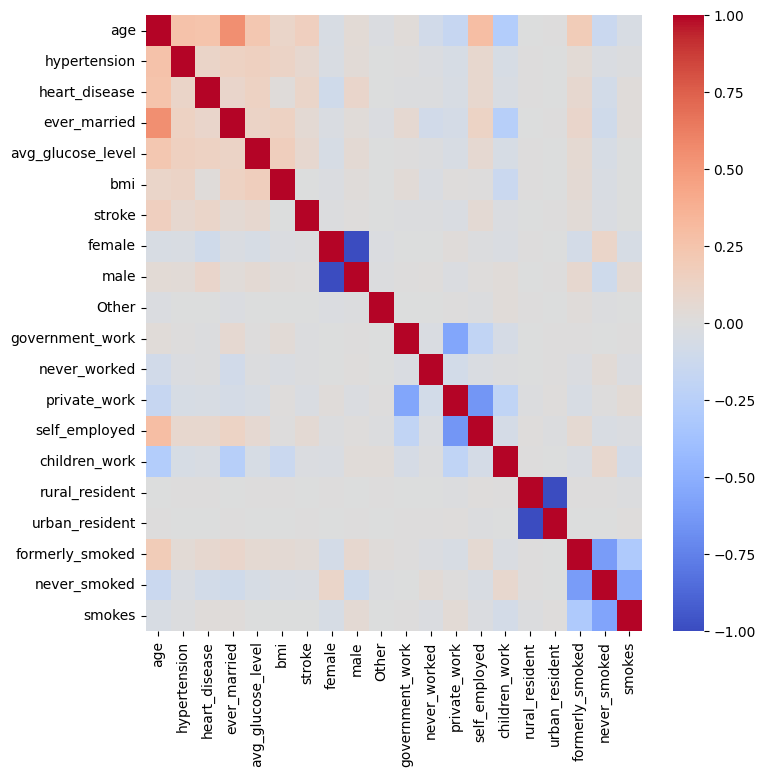

In [ ]:
import seaborn as sns
correlation=df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

## Checking Imabalanced Dataset

In [ ]:
print(df['stroke'].value_counts())

0    29470
1      638
Name: stroke, dtype: int64


**Over sampling**


In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [ ]:
categorical_features = [
    'hypertension',
    'heart_disease',
    'ever_married',
    'female',
    'male',
    'government_work',
    'never_worked',
    'private_work',
    'self_employed',
    'children_work',
    'rural_resident',
    'urban_resident',
    'smoking_unknown',
    'formerly_smoked',
    'never_smoked',
    'smokes'
]

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split


categorical_features_indices = []
for feature in X.columns:
    if feature in categorical_features:
        categorical_features_indices.append(True)
    else:
        categorical_features_indices.append(False)

smote = SMOTENC(categorical_features=categorical_features_indices)


X_resampled, y_resampled = smote.fit_resample(X, y)

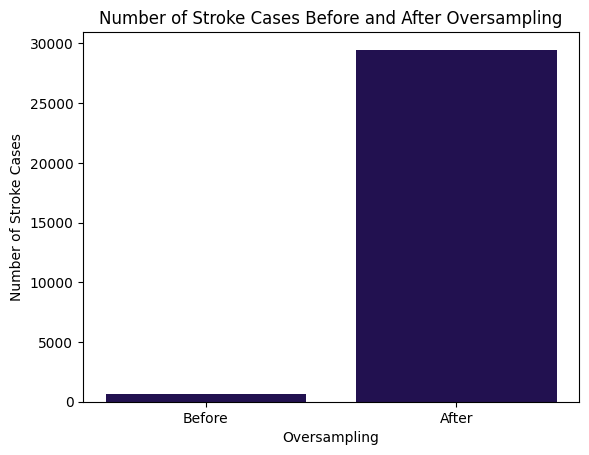

In [ ]:
num_stroke_before = y.sum()
num_stroke_after = y_resampled.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

**train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

In [ ]:
y_resampled.value_counts()

0    29470
1    29470
Name: stroke, dtype: int64

**Model Training**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),

}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


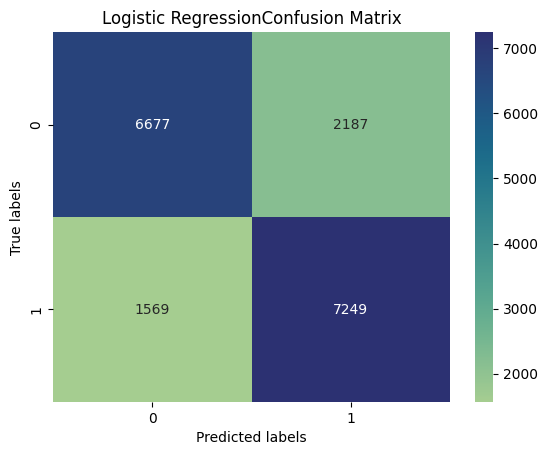

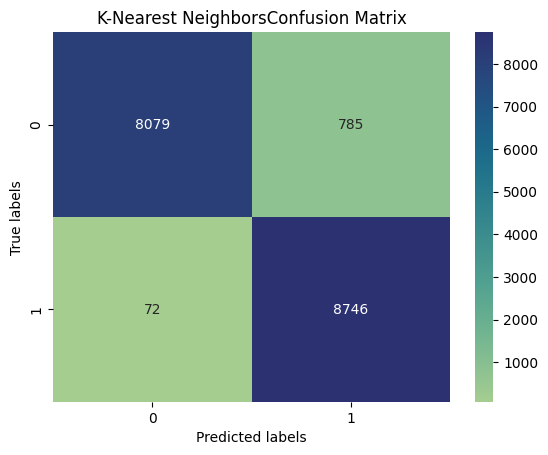

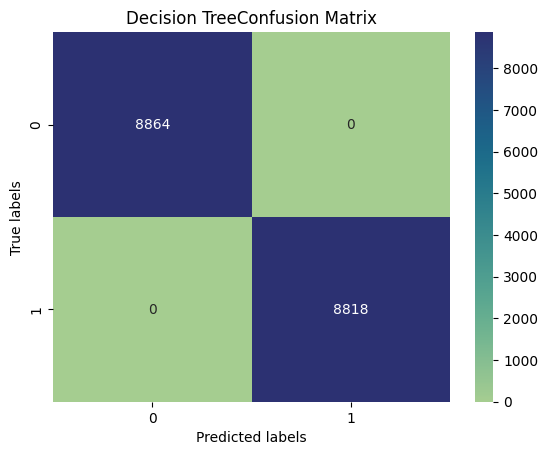

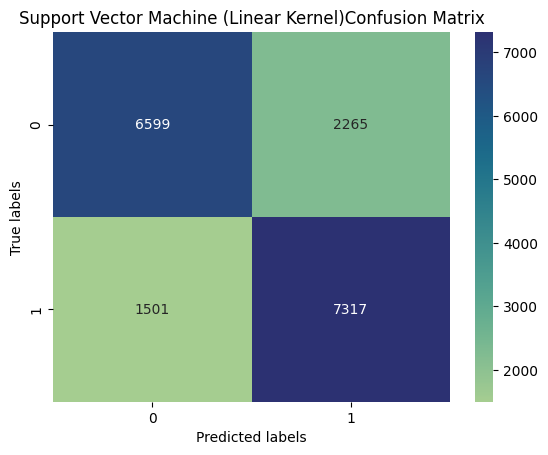

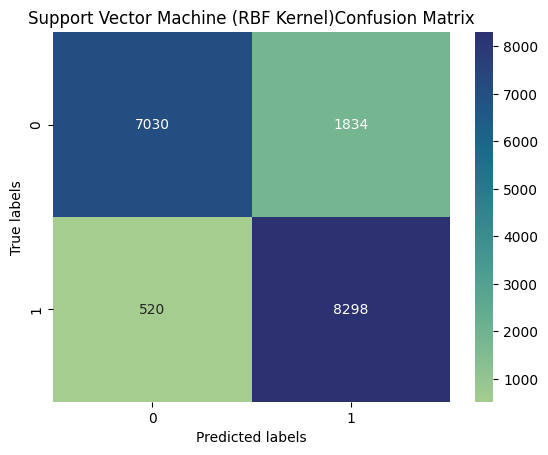

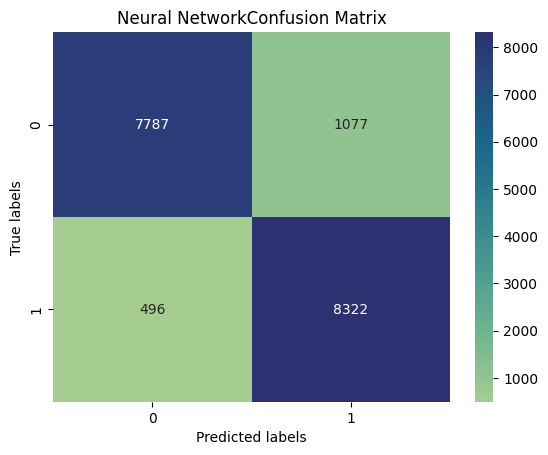

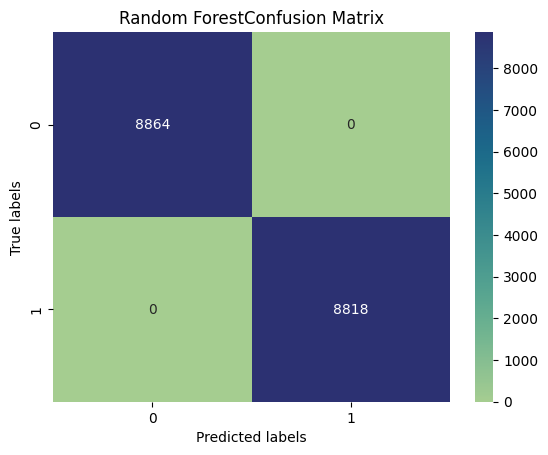

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='crest', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(name + 'Confusion Matrix')
    plt.show()


In [ ]:
accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]

Logistic Regression Accuracy: 78.758%
				Precision: 76.823%
				   Recall: 82.207%
				 F1-Score: 79.424%

K-Nearest Neighbors Accuracy: 95.153%
				Precision: 91.764%
				   Recall: 99.183%
				 F1-Score: 95.329%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 78.702%
				Precision: 76.362%
				   Recall: 82.978%
				 F1-Score: 79.533%

Support Vector Machine (RBF Kernel) Accuracy: 86.687%
				Precision: 81.899%
				   Recall: 94.103%
				 F1-Score: 87.578%

Neural Network Accuracy: 91.104%
				Precision: 88.541%
				   Recall: 94.375%
				 F1-Score: 91.365%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%



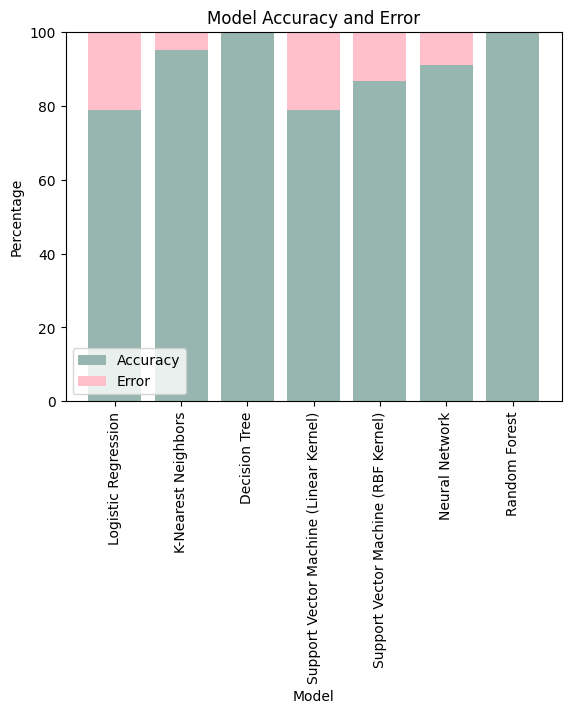

In [ ]:
plt.bar(models.keys(), accuracy_scores, label='Accuracy', color='#96b6af')
plt.bar(models.keys(), error_scores, bottom=accuracy_scores, label='Error', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy and Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()


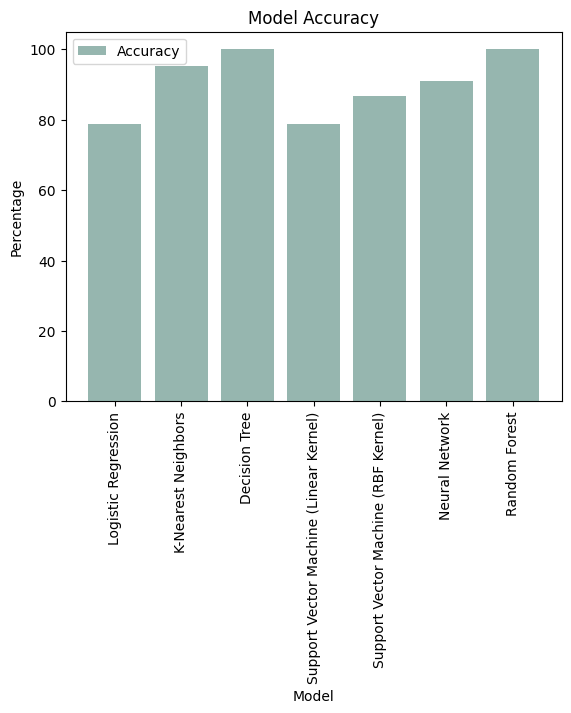

In [ ]:
plt.bar(models.keys(), accuracy_scores, label='Accuracy', color='#96b6af')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

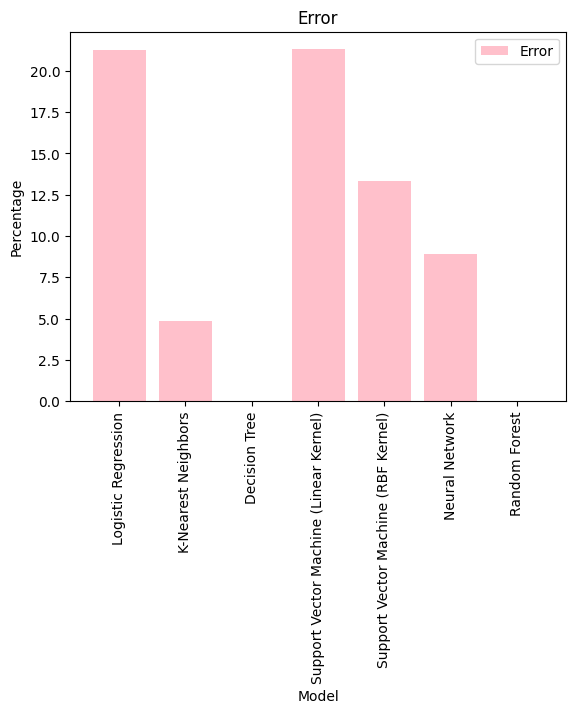

In [ ]:
plt.bar(models.keys(), error_scores, label='Error', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()